/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_24905/590577333.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close vs. Moving Average')

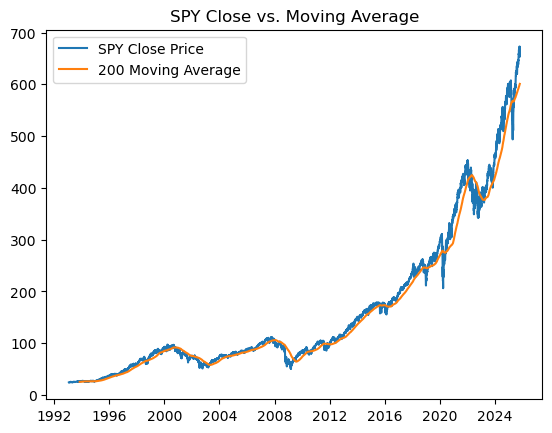

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Calculate the moving average for a Ticker
TICKER = "SPY"
WINDOW = 200

df = yf.download(TICKER, start="1993-01-01")
df["MA"] = df["Close"].rolling(WINDOW).mean()

plt.plot(df["Close"]) # Blue
plt.plot(df["MA"]) #Yellow
plt.legend([f"{TICKER} Close Price", f"{WINDOW} Moving Average"])
plt.title(f"{TICKER} Close vs. Moving Average")

In [2]:
#Drop na
df = df.dropna()
# Exclude SPY - Avoid Multi-index
df.columns = df.columns.get_level_values(0)
df["Strategy"] = (df["Close"]>df["MA"]).astype(int) #asType: Long when True or Short when False
df

Price,Close,High,Low,Open,Volume,MA,Strategy
Date,,,,,,,
1993-11-11,26.127562,26.268411,26.109955,26.197986,88900,25.238249,1
1993-11-12,26.250803,26.338834,26.162772,26.180378,108200,25.247938,1
1993-11-15,26.233198,26.303623,26.162773,26.303623,243300,25.256674,1
1993-11-16,26.356440,26.374046,26.180378,26.286015,492600,25.265767,1
1993-11-17,26.215580,26.374035,26.145155,26.374035,39600,25.272859,1
...,...,...,...,...,...,...,...
2025-10-08,673.109985,673.210022,669.419983,670.250000,60702200,599.362434,1
2025-10-09,671.159973,673.940002,669.210022,673.530029,66501900,599.822934,1
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,600.157958,1


In [3]:
#To be able to do multilplications later, we will use: 1/-1 instead of 1/0
import numpy as np

def add_strategy(df):
    df["Strategy"] = np.where(df["Close"]>df["MA"],1,-1)
    return df

df = add_strategy(df) #Strategy Index: 1 for Longing, -1 for Shorting

## Buy and Hold Strategy
df["asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1 # Cumulative Growth, the same as p1*(1+g1)*(1+g2)*(1+g3)
## MA Strategy (Implying Crossover on the following Day)
df["strategy_cumulative_1"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
# - Crossover (CO): involves a shorter-term indicator crossing over a longer-term one signaling a trade & Strategy Column
# - Bullish CO (1): When a short-term MA (eg 50-day MA) crosses above a long-term MA (eg 200-day MA) -> Signaling building upward momentum
# - Bearish CO (0): When a short-term MA crosses below a long-term MA -> Signaling building downward momentum.
# - CO Signals can only be confirmed at the close of the market (Day T) and acted at the opening of the next market session (Day T+1)

## MA Strategy (Not Implying Crossover on the following Day, So no Inflated Results)
df["strategy_cumulative_2"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"].shift()) - 1
# shift everything by one day
# A crossover signal is confirmed at the close of Day T-1.
# You use that signal to decide your position for all of Day T.
# You capture the market return from Day T based on that decision.

df
 

Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative_1,strategy_cumulative_2
Date,,,,,,,,,,
1993-11-11,26.127562,26.268411,26.109955,26.197986,88900,25.238249,1,NaN,NaN,NaN
1993-11-12,26.250803,26.338834,26.162772,26.180378,108200,25.247938,1,0.004717,0.004717,0.004717
1993-11-15,26.233198,26.303623,26.162773,26.303623,243300,25.256674,1,0.004043,0.004043,0.004043
1993-11-16,26.356440,26.374046,26.180378,26.286015,492600,25.265767,1,0.008760,0.008760,0.008760
1993-11-17,26.215580,26.374035,26.145155,26.374035,39600,25.272859,1,0.003369,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...,...
2025-10-08,673.109985,673.210022,669.419983,670.250000,60702200,599.362434,1,24.762449,2942.387374,2.890145
2025-10-09,671.159973,673.940002,669.210022,673.530029,66501900,599.822934,1,24.687815,2933.860325,2.878875
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,600.157958,1,23.993531,2854.537612,2.774037


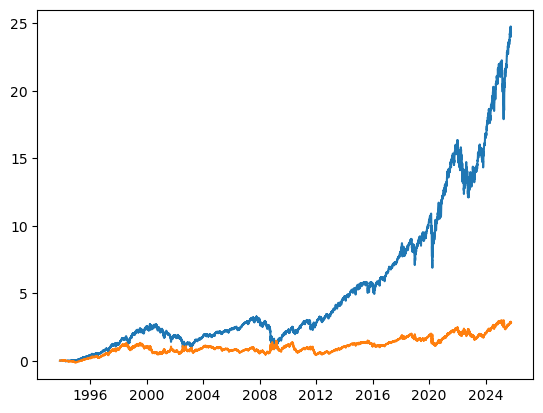

In [4]:
## Buy and Hold Strategy
plt.plot(df["asset_cumulative"])
# If you had bought it in 1993, you would have multiplied your investment by 25x

## MA Strategy (Crossover)
#plt.plot(df["strategy_cumulative_1"])

## MA Strategy (Without Crossover)
plt.plot(df["strategy_cumulative_2"])

/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_24905/1513028224.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.313026,24.330319,24.209272,24.330319,1003200,NaN,NaN,NaN,NaN
1993-02-01,24.485960,24.485960,24.330329,24.330329,480500,NaN,-1.0,0.007113,-0.007113
1993-02-02,24.537834,24.555127,24.416788,24.468665,201300,NaN,-1.0,0.009246,-0.009216
1993-02-03,24.797226,24.814518,24.555133,24.572425,529400,NaN,-1.0,0.019915,-0.019690
1993-02-04,24.900978,24.952855,24.607008,24.883686,531500,NaN,-1.0,0.024183,-0.023792
...,...,...,...,...,...,...,...,...,...
2025-10-09,671.159973,673.940002,669.210022,673.530029,66501900,599.822933,1.0,26.604954,2.583565
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,600.157957,1.0,25.858854,2.486709
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,600.525535,1.0,26.270977,2.540209


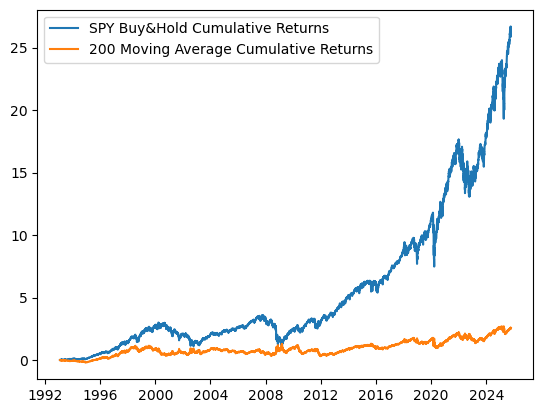

In [5]:
# Clean Code
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Test different values on our Global Variables
TICKER = "SPY"
WINDOW = 200
# Take a rather inefficient Ticket with a 200 MA
#TICKER = "TSLA"
#WINDOW = 200
# It does not work, showing that a simple moving average strategy does not give you an advantage

# Bring all of the Code together in 3 Functions

def get_data():
    df = yf.download(TICKER, start="1993-01-01")
    #Drop NA
    df = df.dropna()
    df.columns = df.columns.get_level_values(0)
    df["MA"] = df["Close"].rolling(WINDOW).mean()
    return df

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df["Strategy"] = np.where(df["Close"] > df["MA"],1,-1)
    # Shift Strategy on 1 Day to calculate the strategy on the previous day
    df["Strategy"] = df["Strategy"].shift(1)
    return df

def test_strategy(df):
    df["asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    # Plot the returns: Buy & Hold vs. Trading Strategy
    plt.plot(df["asset_cumulative"])
    plt.plot(df["strategy_cumulative"])
    plt.legend([f"{TICKER} Buy&Hold Cumulative Returns", f"{WINDOW} Moving Average Cumulative Returns"])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()
# We can therefore see that this strategy does not work
